# Income Estimation

## US Census Demographic Data

dataset: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data

# Table of Contents
>## 1. Notebook Imports
>## 2. Loading Data
>## 3. Exploratory Data Analysis and Preprocessing
>## 4. Modelling
>>### 4.1. K-Nearest Neighbors (KNN) Algorithm
>>### 4.2. Logistic Regression
>>### 4.3. Support Vector Machine (SVM)
>>### 4.4. Random Forest 
>>### 4.5. Gradient Boosting
>## 5.Model Evaluation
>## 6.Hyperparameter Optimization and an Ensemble Model

## 1. Notebook Imports

In [1]:
import numpy as np
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.4f}'.format})

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Loading Data

In [2]:
data=pd.read_csv('data\\acs2017_census_tract_data.csv')
data.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


## 3. Exploratory Data Analysis and Preprocessing

In [3]:
data.shape

(74001, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [5]:
data.isnull().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [6]:
#Let's drop the rows containing NaN
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [8]:
data[data.duplicated()]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TractId,72718.0,2.837292e+10,1.644198e+10,1.001020e+09,1.304703e+10,2.804700e+10,4.200341e+10,7.215375e+10
TotalPop,72718.0,4.443485e+03,2.190183e+03,5.800000e+01,2.958000e+03,4.137000e+03,5.532750e+03,6.552800e+04
Men,72718.0,2.184363e+03,1.099954e+03,2.600000e+01,1.440000e+03,2.024000e+03,2.719000e+03,3.226600e+04
Women,72718.0,2.259122e+03,1.124605e+03,2.700000e+01,1.494000e+03,2.102000e+03,2.817000e+03,3.326200e+04
Hispanic,72718.0,1.728295e+01,2.308443e+01,0.000000e+00,2.600000e+00,7.400000e+00,2.110000e+01,1.000000e+02
White,72718.0,6.133714e+01,3.062803e+01,0.000000e+00,3.810000e+01,7.050000e+01,8.770000e+01,1.000000e+02
Black,72718.0,1.325442e+01,2.158127e+01,0.000000e+00,8.000000e-01,3.800000e+00,1.450000e+01,1.000000e+02
Native,72718.0,7.277758e-01,4.505791e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,9.940000e+01
Asian,72718.0,4.752459e+00,8.995573e+00,0.000000e+00,2.000000e-01,1.500000e+00,5.000000e+00,9.140000e+01
Pacific,72718.0,1.460821e-01,1.015198e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.190000e+01


In [11]:
data.describe(include='O').T

,count,unique,top,freq
State,72718,52,California,7932
County,72718,1954,Los Angeles County,2300


In [12]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.271800e+04,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,...,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000
mean,2.837292e+10,4443.485121,2184.362647,2259.122473,17.282951,61.337143,13.254417,0.727776,4.752459,0.146082,...,2.925778,1.886076,4.612646,26.080334,2081.309139,79.511827,14.149495,6.167661,0.171231,7.224917
std,1.644198e+10,2190.183318,1099.954423,1124.604806,23.084428,30.628031,21.581269,4.505791,8.995573,1.015198,...,5.260623,2.485812,3.770733,7.095680,1120.109805,7.957350,7.164790,3.798703,0.451630,5.099419
min,1.001020e+09,58.000000,26.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.200000,20.000000,17.500000,0.000000,0.000000,0.000000,0.000000
25%,1.304703e+10,2958.000000,1440.000000,1494.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1306.000000,75.300000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4137.000000,2024.000000,2102.000000,7.400000,70.500000,3.800000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1915.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5532.750000,2719.000000,2817.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2651.000000,85.000000,17.600000,8.000000,0.000000,9.000000
90%,4.845795e+10,7023.000000,3485.000000,3589.000000,52.200000,94.700000,41.800000,1.200000,12.600000,0.200000,...,6.800000,4.500000,9.300000,35.300000,3436.000000,88.400000,23.000000,11.000000,0.600000,13.300000
95%,5.303303e+10,8070.000000,4021.150000,4119.000000,74.400000,96.600000,69.100000,2.200000,21.200000,0.600000,...,10.700000,6.300000,11.500000,38.800000,3995.000000,90.300000,27.000000,13.200000,1.000000,16.900000
99%,7.202103e+10,11280.000000,5651.830000,5778.660000,98.800000,98.600000,94.400000,10.600000,47.700000,3.100000,...,27.800000,11.600000,17.200000,46.400000,5483.830000,93.600000,37.400000,18.800000,2.000000,26.500000


In [13]:
#Let's delete first 3 column, unnecessary for our analysis, we also can drop the IncomeErr, IncomePerCap and IncomePerCapErr columns.
data_new= data.drop(['TractId', 'State', 'County','IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)
data_new.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [14]:
#Generally, population metrics are in % of the population, 
#but these metrics are total values.

data[["TotalPop","Men","Women","VotingAgeCitizen","Employed"]].describe()

,TotalPop,Men,Women,VotingAgeCitizen,Employed
count,72718.000000,72718.000000,72718.000000,72718.000000,72718.000000
mean,4443.485121,2184.362647,2259.122473,3141.161982,2081.309139
std,2190.183318,1099.954423,1124.604806,1512.610257,1120.109805
min,58.000000,26.000000,27.000000,40.000000,20.000000
25%,2958.000000,1440.000000,1494.000000,2096.000000,1306.000000
50%,4137.000000,2024.000000,2102.000000,2926.000000,1915.000000
75%,5532.750000,2719.000000,2817.000000,3923.000000,2651.000000
max,65528.000000,32266.000000,33262.000000,39389.000000,28945.000000


TotalPop always is the sum of Men and Women population, let's drop it:

In [15]:
data_new= data_new.drop(['TotalPop'], axis=1)
data_new.head()

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [16]:
# Converting "Men","Women","VotingAgeCitizen","Employed" columns to % of Total Population
convert = ['Men','Women','VotingAgeCitizen','Employed']
data_new[convert] = data_new[convert].div(data["TotalPop"], axis="index")*100

In [17]:
#The percentage of Native, Asian, and Pacific races is generally very low. so let's assign this three features to a feature.
data_new['RaceOther']= data_new['Asian'] + data_new['Pacific']+ data_new['Native']
data_new=data_new.drop(['Asian', 'Pacific','Native'], axis=1)

In [18]:
# to calculate some metrics, Filter out data where Income is > 0 in the dataset
data_new = data_new.loc[data_new['Income'] > 0]

In [19]:
data_new.head()

,Men,Women,Hispanic,White,Black,VotingAgeCitizen,Income,Poverty,ChildPoverty,Professional,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,RaceOther
0,48.726287,51.273713,2.4,86.3,5.2,76.260163,67826.0,10.7,20.8,38.5,...,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6,1.2
1,53.729282,46.270718,1.1,41.6,54.5,76.058932,41287.0,22.4,35.8,30.5,...,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4,1.0
2,45.288035,54.711965,8.0,61.4,26.5,73.264402,46806.0,14.7,21.1,27.9,...,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7,1.7
3,46.894774,53.105226,9.6,80.3,7.1,76.329974,55895.0,2.3,1.7,29.0,...,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1,0.7
4,50.717511,49.282489,0.9,77.5,16.4,72.543904,68143.0,12.2,17.9,48.8,...,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3,3.1


In [20]:
#to move the target column to the last
cols = list(data_new.columns.values)
cols.pop(cols.index('Income')) 
data_new = data_new[cols+['Income']]
data_new.head()

,Men,Women,Hispanic,White,Black,VotingAgeCitizen,Poverty,ChildPoverty,Professional,Service,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,RaceOther,Income
0,48.726287,51.273713,2.4,86.3,5.2,76.260163,10.7,20.8,38.5,15.6,...,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6,1.2,67826.0
1,53.729282,46.270718,1.1,41.6,54.5,76.058932,22.4,35.8,30.5,24.9,...,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4,1.0,41287.0
2,45.288035,54.711965,8.0,61.4,26.5,73.264402,14.7,21.1,27.9,19.4,...,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7,1.7,46806.0
3,46.894774,53.105226,9.6,80.3,7.1,76.329974,2.3,1.7,29.0,16.6,...,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1,0.7,55895.0
4,50.717511,49.282489,0.9,77.5,16.4,72.543904,12.2,17.9,48.8,13.8,...,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3,3.1,68143.0


In [21]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Men               72718 non-null  float64
 1   Women             72718 non-null  float64
 2   Hispanic          72718 non-null  float64
 3   White             72718 non-null  float64
 4   Black             72718 non-null  float64
 5   VotingAgeCitizen  72718 non-null  float64
 6   Poverty           72718 non-null  float64
 7   ChildPoverty      72718 non-null  float64
 8   Professional      72718 non-null  float64
 9   Service           72718 non-null  float64
 10  Office            72718 non-null  float64
 11  Construction      72718 non-null  float64
 12  Production        72718 non-null  float64
 13  Drive             72718 non-null  float64
 14  Carpool           72718 non-null  float64
 15  Transit           72718 non-null  float64
 16  Walk              72718 non-null  float6

In [22]:
Categorical=data.select_dtypes(include='object').columns.tolist()
Categorical

['State', 'County']

In [23]:
Numerical=data_new.select_dtypes(exclude='object').columns.tolist()
Numerical

['Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'VotingAgeCitizen',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'RaceOther',
 'Income']

### Some views of the Dataset

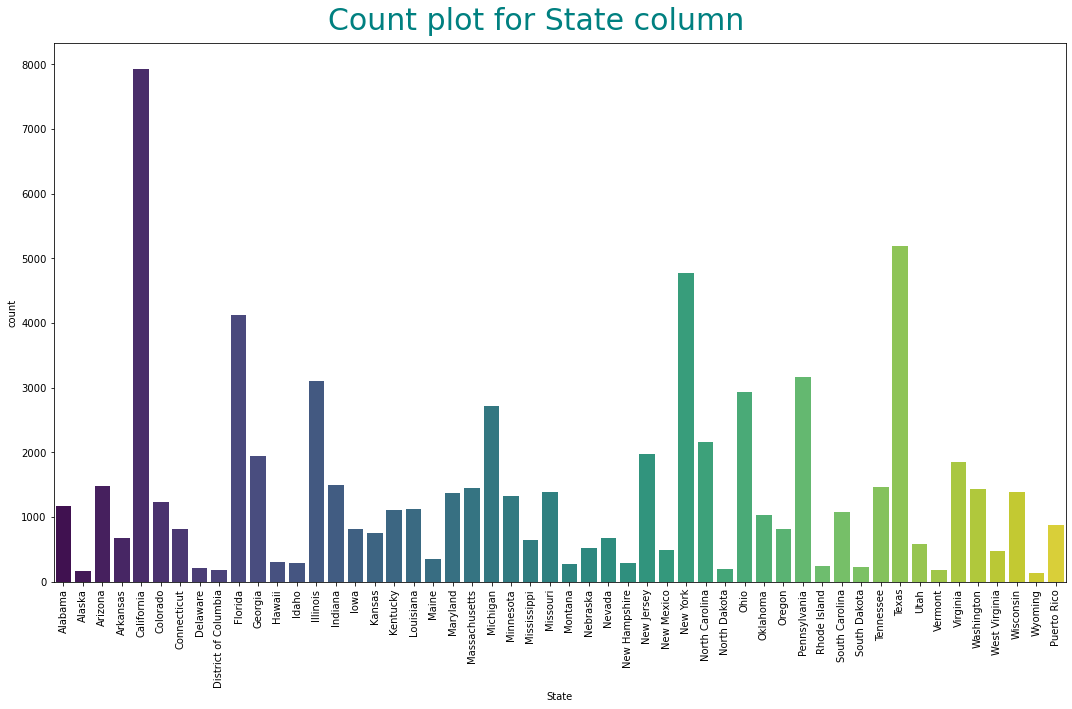

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.suptitle('Count plot for State column', fontsize = 30, color= 'teal')
ax= sns.countplot(x=data["State"], palette= 'viridis')
ax.set(xlabel = "State")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [25]:
income_state= data.groupby(['State'],as_index=False)['Income'].mean().sort_values("Income", ascending = False)
income_state

,State,Income
8,District of Columbia,83202.653409
20,Maryland,83046.715843
30,New Jersey,81297.738516
6,Connecticut,79622.418919
11,Hawaii,79511.065147
21,Massachusetts,78684.783058
47,Virginia,76522.147929
1,Alaska,73796.757576
29,New Hampshire,73360.291096
4,California,73126.602496


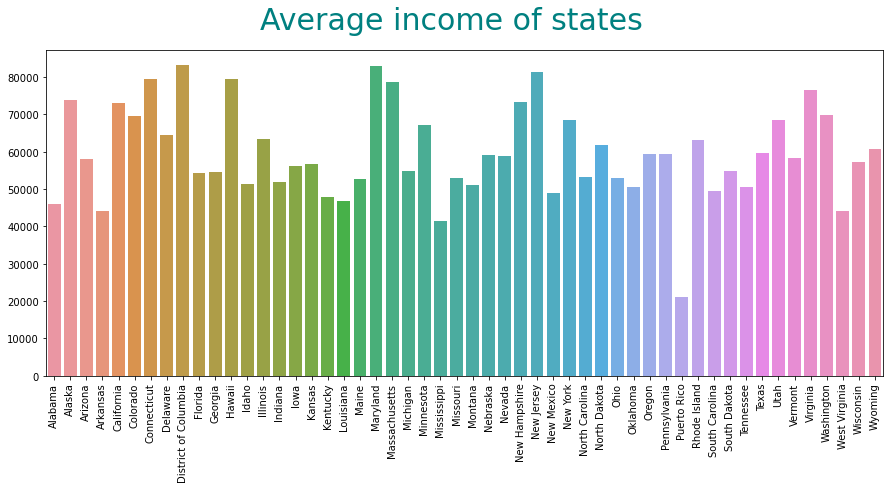

In [26]:
income_state= data.groupby(['State'],as_index=False)['Income'].mean()

fig, ax = plt.subplots(figsize=(15, 6))
plt.suptitle('Average income of states', fontsize = 30, color= 'teal')
ax = sns.barplot(x=income_state['State'].values, y=income_state['Income'].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

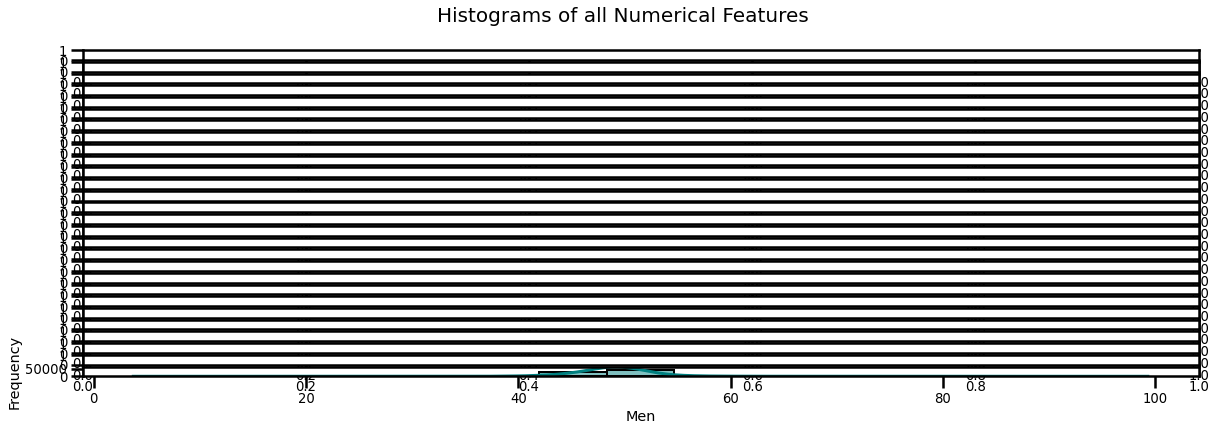

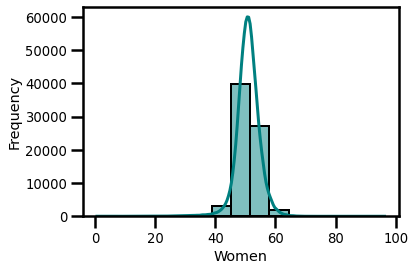

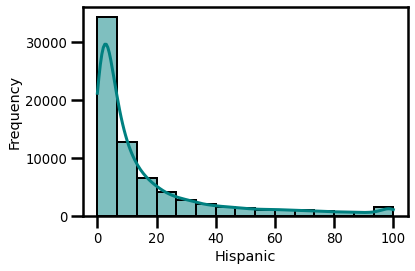

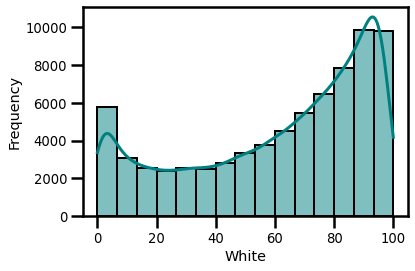

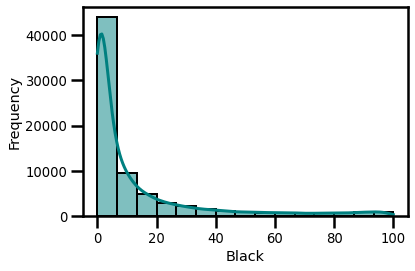

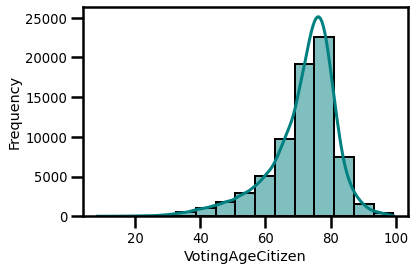

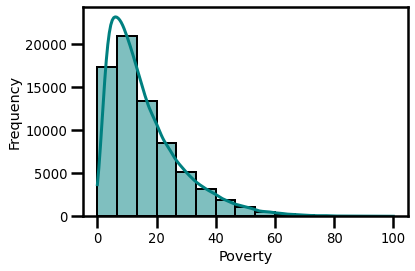

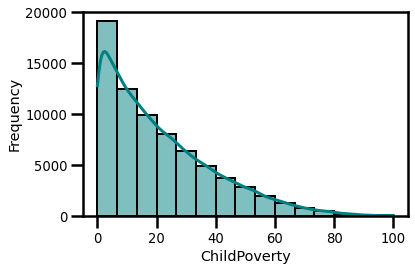

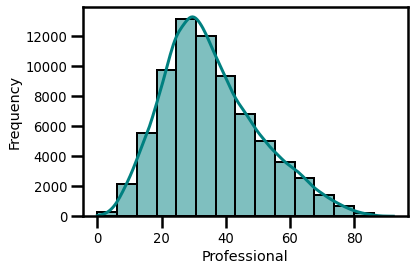

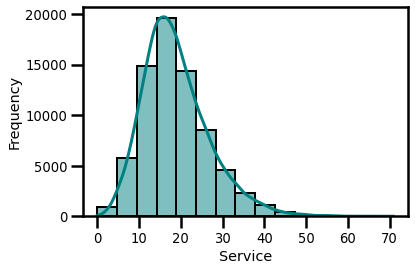

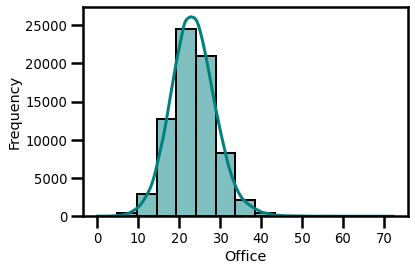

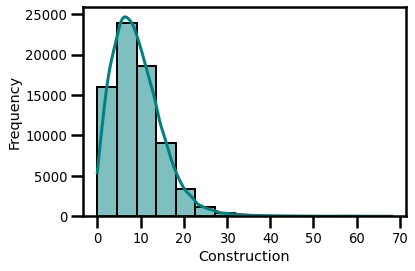

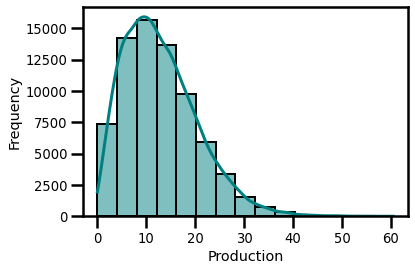

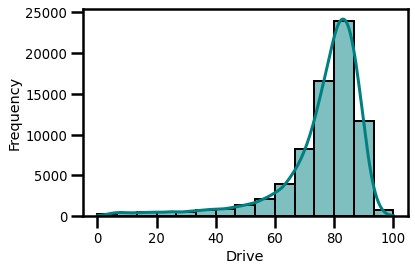

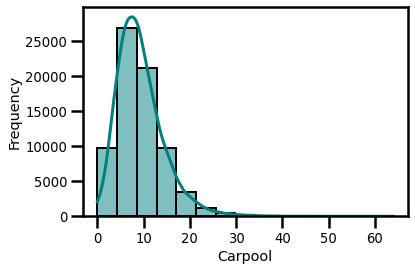

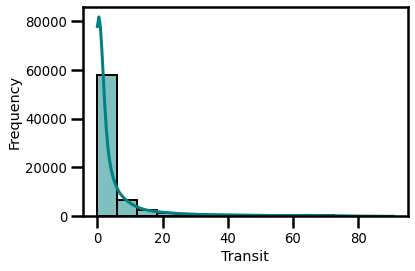

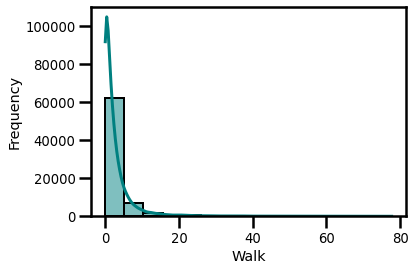

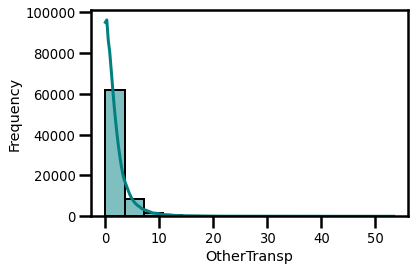

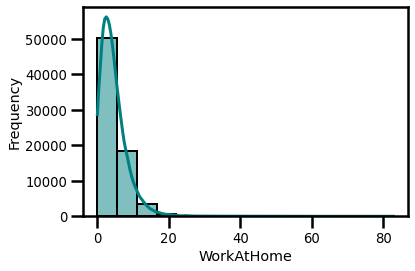

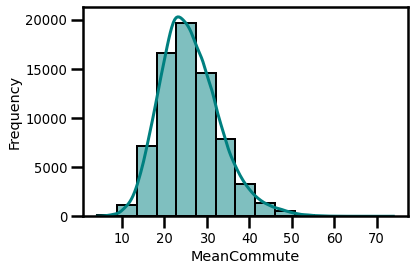

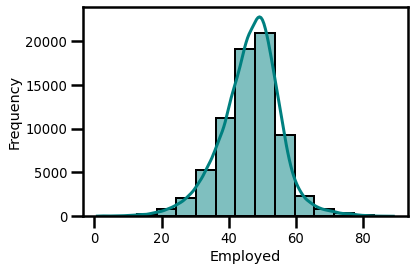

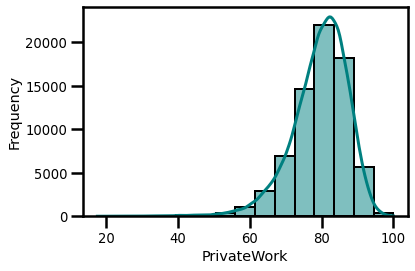

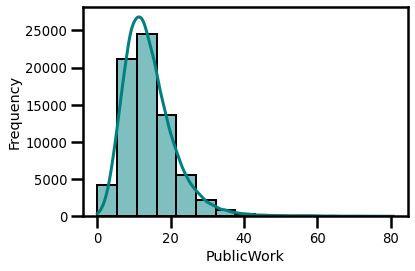

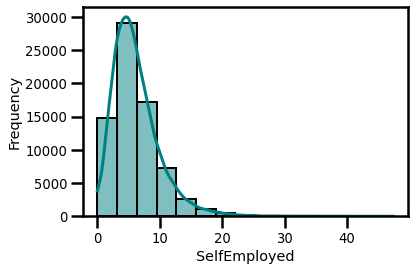

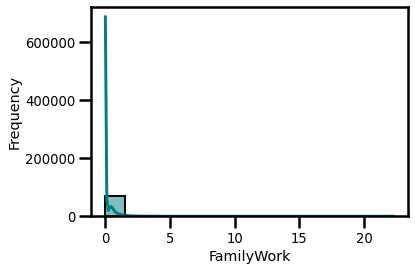

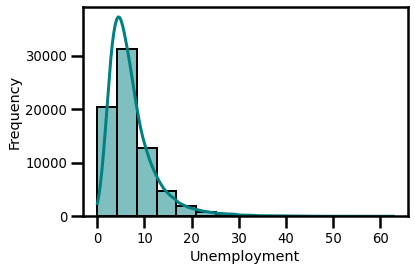

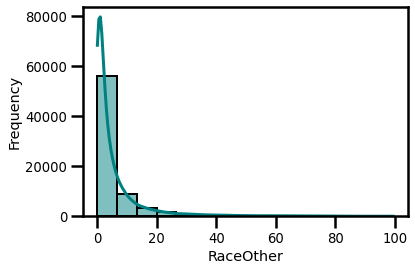

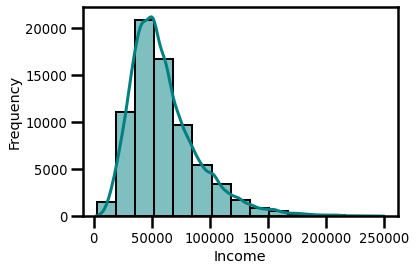

In [27]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(len(Numerical), 1, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

for i in Numerical:
    ax=sns.histplot(x= data_new[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')
    
    plt.tight_layout()
    plt.show()

let's look at the correlations before we build the models:

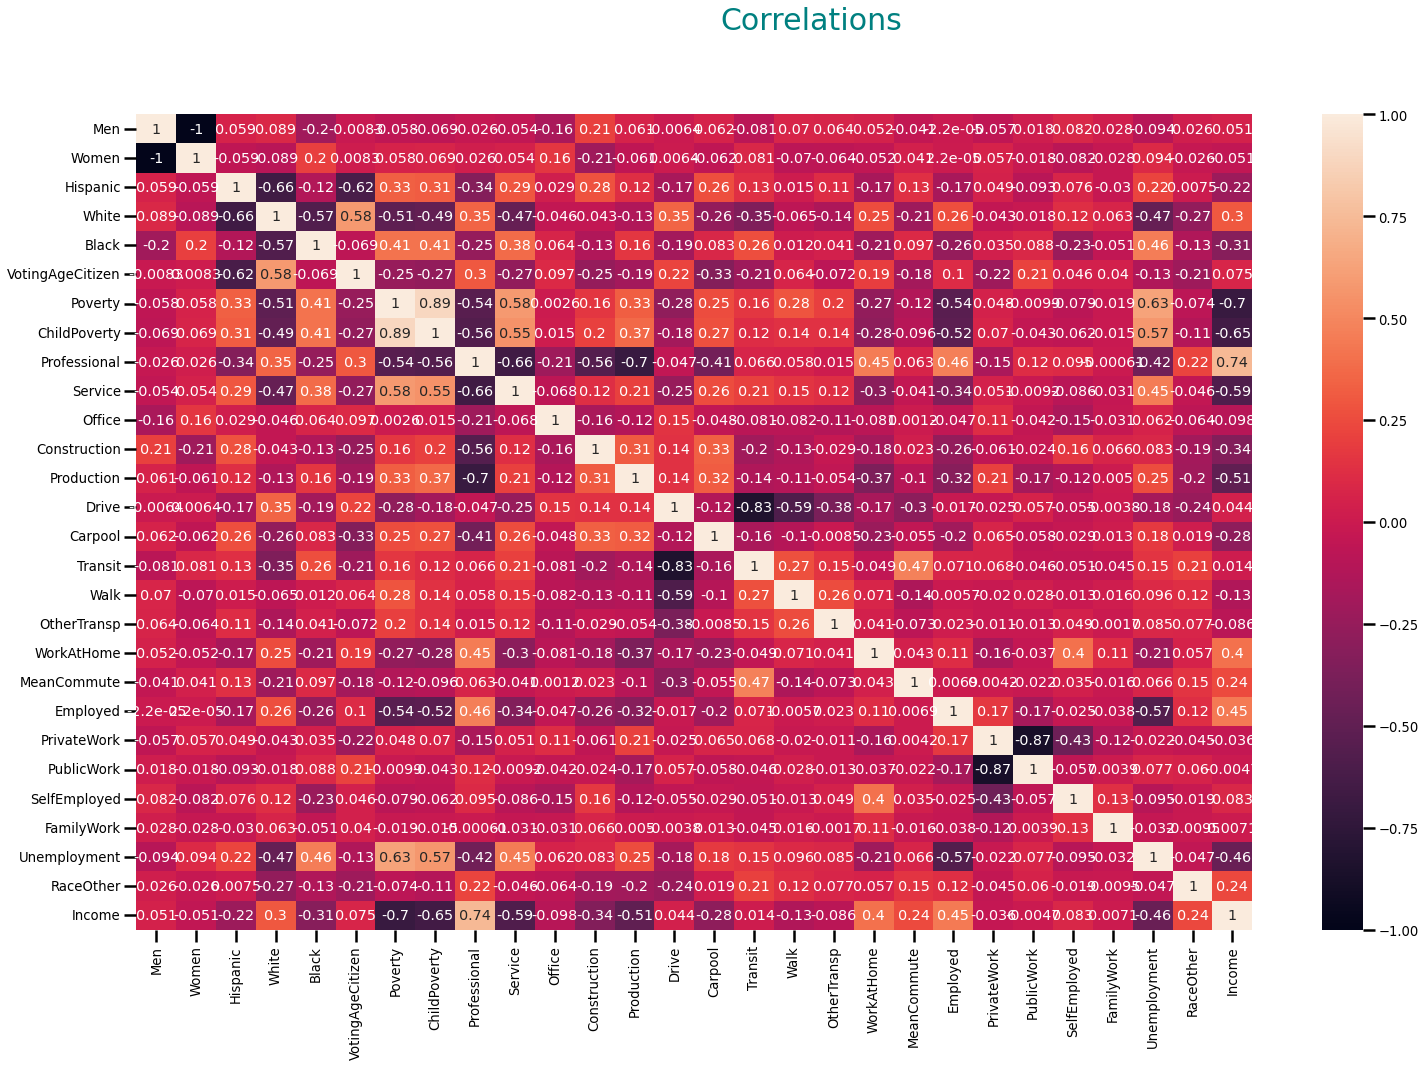

In [28]:
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = data_new.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
for i in data_new.columns:
    cor_x=data_new[i]
    cor_y=data_new['Income']
    print(i,":", cor_x.corr(cor_y)*100)

Men : 5.12272444338367
Women : -5.122724443383668
Hispanic : -22.321616775352002
White : 30.436711279202633
Black : -31.31343295203748
VotingAgeCitizen : 7.515923048839439
Poverty : -69.54192381625683
ChildPoverty : -64.95426501516921
Professional : 73.71190997598552
Service : -58.58337778920549
Office : -9.804291116125572
Construction : -33.93563024260502
Production : -50.723445166195845
Drive : 4.415357440852726
Carpool : -28.141383268545283
Transit : 1.4167496041355765
Walk : -13.264187155264425
OtherTransp : -8.562624642943748
WorkAtHome : 40.369847664168105
MeanCommute : 24.329040724060402
Employed : 44.500138324648375
PrivateWork : -3.5856056391158493
PublicWork : -0.4683975069533505
SelfEmployed : 8.310958779972747
FamilyWork : 0.7076658123181473
Unemployment : -45.76275945435594
RaceOther : 23.670928642996238
Income : 99.99999999999999


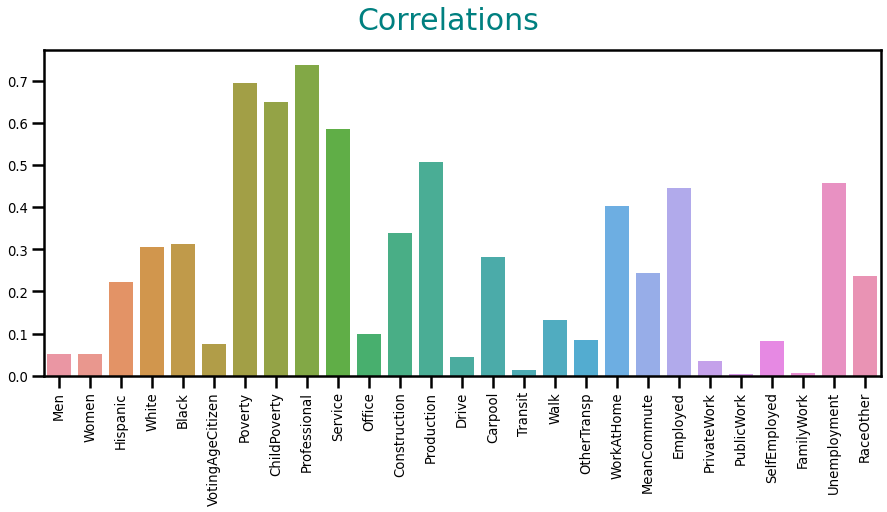

In [30]:
correlations=data_new.corr()['Income'][:-1].abs()
fig, ax = plt.subplots(figsize=(15, 6))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
ax = sns.barplot(x=correlations.index.values, y=correlations.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Handling Outliers

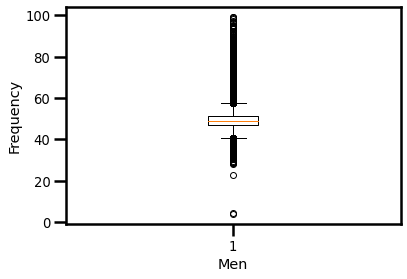

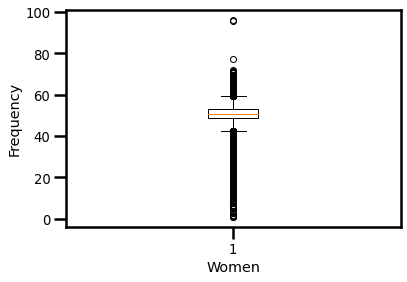

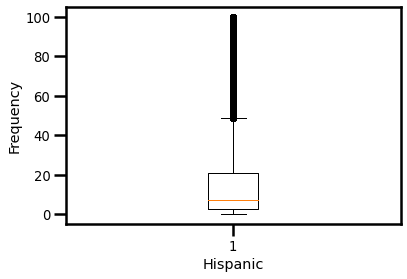

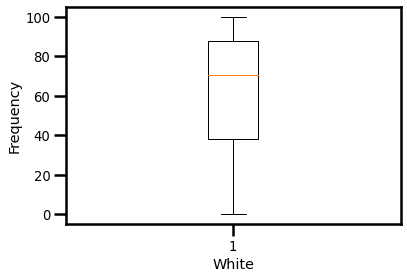

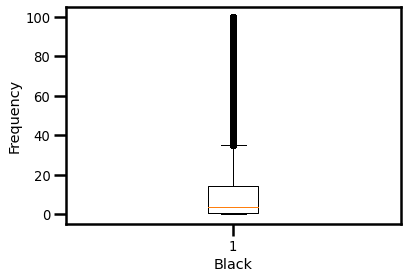

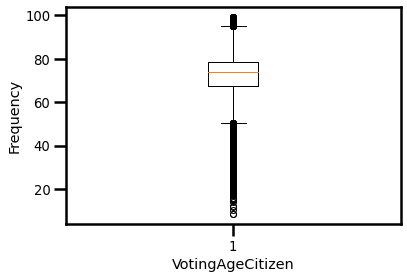

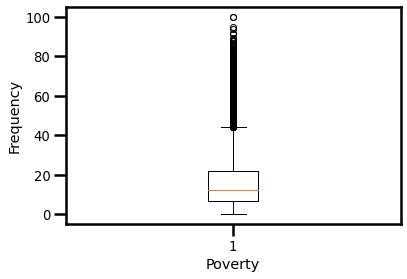

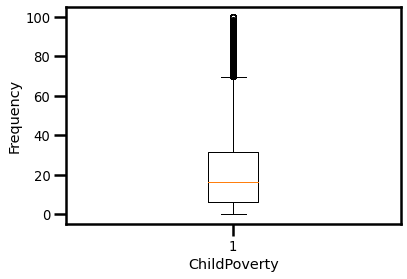

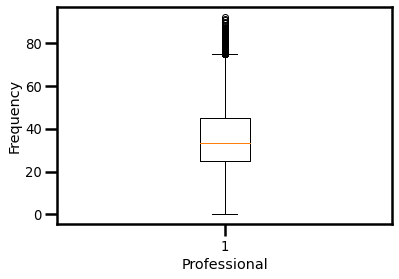

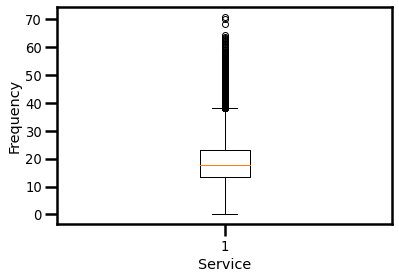

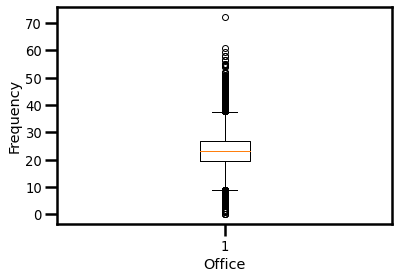

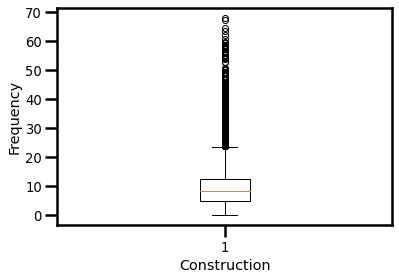

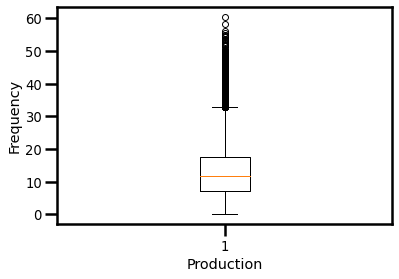

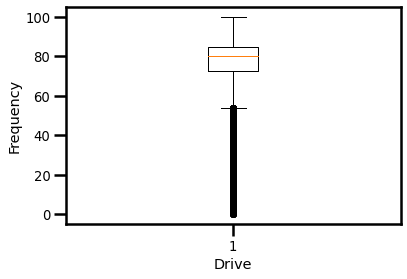

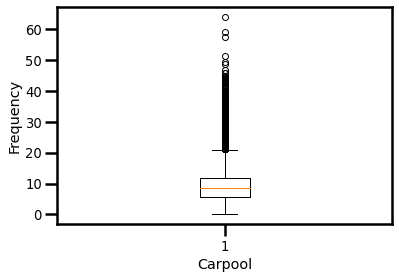

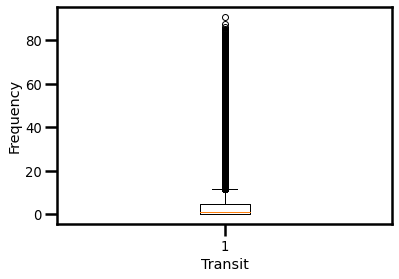

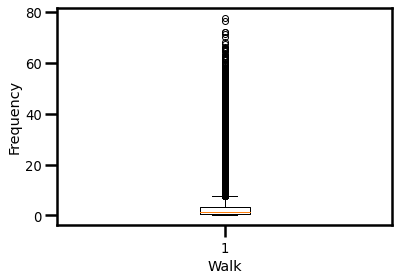

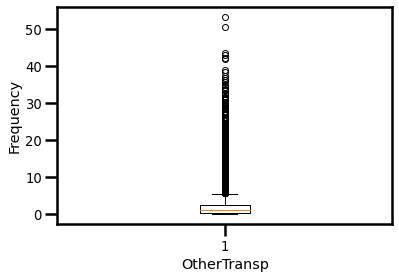

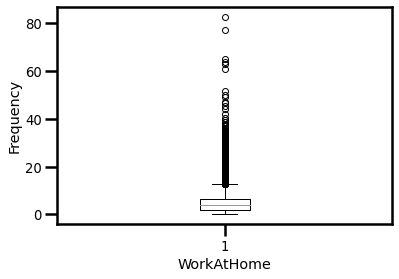

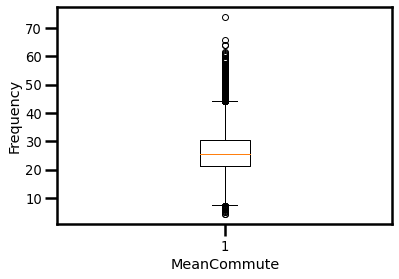

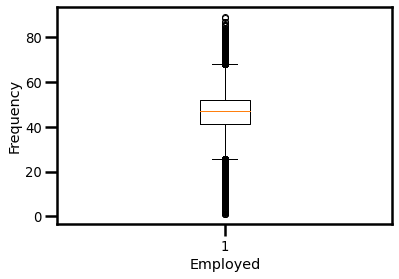

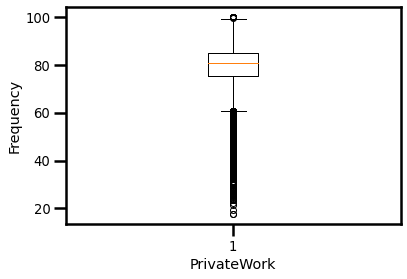

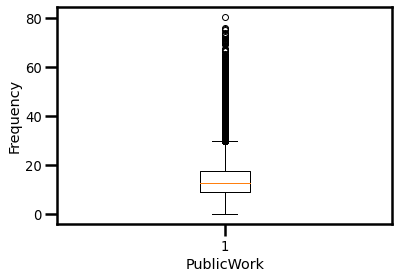

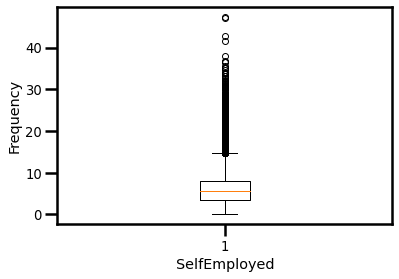

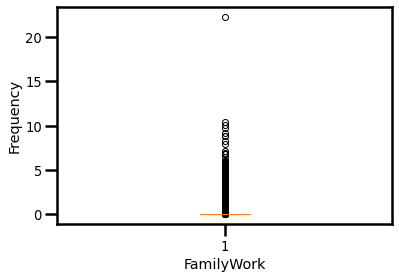

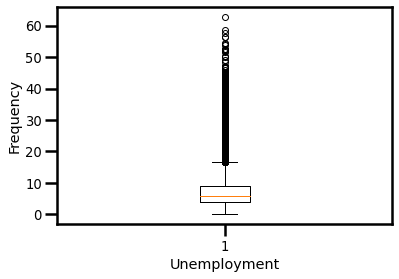

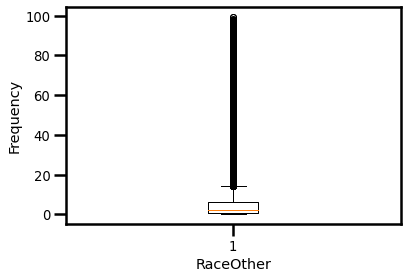

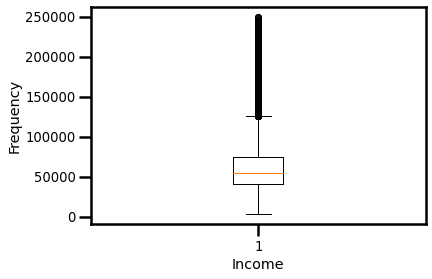

In [31]:
for i in Numerical:
    plt.figure()
    plt.tight_layout()
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    plt.boxplot(data_new[i]) 

In [32]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)
unique_values=[None]*len(Numerical)
ratio=[None]*len(Numerical)

for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(data_new[p],[95,5])
    IQR[i]= q75[i]- q25[i]
    #number_of_outliers[i]=df[~((df[p] < (q75[i] + 1.5 * IQR[i])) & (df[p] > (q25[i]-1.5*IQR[i])))].shape[0]
    number_of_outliers[i]=len((np.where((data_new[p] > (q75[i] + 1.5 * IQR[i])) | (data_new[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    unique_values[i]= len(data_new[p].unique())
    ratio[i]= number_of_outliers[i]/unique_values[i]
    print('outliers of',p," =", number_of_outliers[i])
    print('unique_values',p," =", unique_values[i])
    print('ratio',p," =", ratio[i])
    print("*"*40)

outliers of Men  = 161
unique_values Men  = 68150
ratio Men  = 0.0023624358033749082
****************************************
outliers of Women  = 161
unique_values Women  = 68150
ratio Women  = 0.0023624358033749082
****************************************
outliers of Hispanic  = 0
unique_values Hispanic  = 1001
ratio Hispanic  = 0.0
****************************************
outliers of White  = 0
unique_values White  = 1001
ratio White  = 0.0
****************************************
outliers of Black  = 0
unique_values Black  = 1001
ratio Black  = 0.0
****************************************
outliers of VotingAgeCitizen  = 0
unique_values VotingAgeCitizen  = 70408
ratio VotingAgeCitizen  = 0.0
****************************************
outliers of Poverty  = 2
unique_values Poverty  = 796
ratio Poverty  = 0.002512562814070352
****************************************
outliers of ChildPoverty  = 0
unique_values ChildPoverty  = 954
ratio ChildPoverty  = 0.0
********************************

In [33]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = data_new.quantile(0.05)
Q3 = data_new.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(data_new[((data_new < (Q1 - 1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  2682


It is inevitable to have outliers in the data set. Dropping outliers can make the model less reliable. So, I decided that I will keep them in the dataset.

### Splitting the data into train and test sets

In [34]:
X= data_new.drop(["Income"], axis=1)
y= data_new.Income

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54538, 27), (18180, 27), (54538,), (18180,))

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [39]:
pca = PCA()

In [40]:
pipe = Pipeline(steps=[
             ("scaler", StandardScaler()),
             ("imputer", SimpleImputer()),
             ("pca", pca)])

In [41]:
pipe.fit_transform(X_train)
pipe.transform(X_test)

array([[-2.0551, 6.0844, 1.1815, ..., 0.0046, -0.0008, -0.0000],
       [1.9624, -0.9917, 1.1855, ..., 0.0001, 0.0001, -0.0000],
       [1.6831, -1.6587, 1.1985, ..., 0.0011, 0.0048, -0.0000],
       ...,
       [-2.8355, 1.1640, -1.2557, ..., 0.0000, 0.0000, 0.0000],
       [-0.7506, -1.5381, 1.3137, ..., 0.0001, 0.0001, -0.0000],
       [0.1153, -2.7002, 0.3070, ..., -0.0036, 0.0057, -0.0000]])

### Using PCA

In [42]:
pca.n_components_ 

27

In [43]:
pca.explained_variance_

array([5.6517, 3.0790, 2.4650, 2.2632, 1.7460, 1.4575, 1.2387, 1.1078,
       0.9644, 0.9355, 0.8333, 0.7676, 0.7322, 0.6628, 0.5698, 0.5100,
       0.4978, 0.4371, 0.3704, 0.3392, 0.2791, 0.0894, 0.0029, 0.0000,
       0.0000, 0.0000, 0.0000])

In [44]:
pca.explained_variance_ratio_

array([0.2093, 0.1140, 0.0913, 0.0838, 0.0647, 0.0540, 0.0459, 0.0410,
       0.0357, 0.0346, 0.0309, 0.0284, 0.0271, 0.0245, 0.0211, 0.0189,
       0.0184, 0.0162, 0.0137, 0.0126, 0.0103, 0.0033, 0.0001, 0.0000,
       0.0000, 0.0000, 0.0000])

In [45]:
# Cumulative explained variance
cum_var_exp = np.cumsum(pca.explained_variance_ratio_*100)
cum_var_exp

array([20.9317, 32.3352, 41.4648, 49.8468, 56.3135, 61.7116, 66.2995,
       70.4023, 73.9743, 77.4390, 80.5251, 83.3679, 86.0798, 88.5345,
       90.6450, 92.5339, 94.3775, 95.9963, 97.3681, 98.6243, 99.6582,
       99.9892, 99.9998, 99.9999, 100.0000, 100.0000, 100.0000])

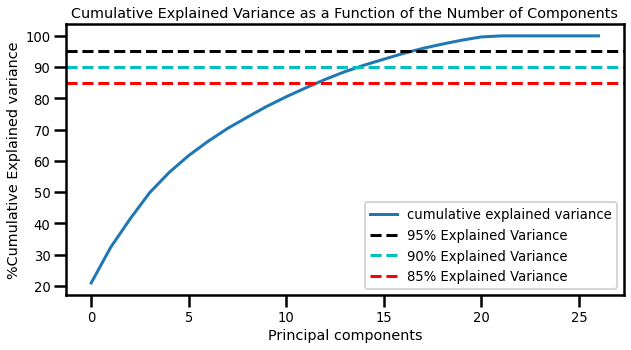

In [46]:
### PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.plot(cum_var_exp, label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('%Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

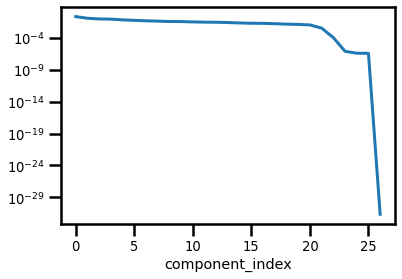

In [47]:
plt.semilogy(pca.explained_variance_ratio_)
plt.xlabel("component_index");

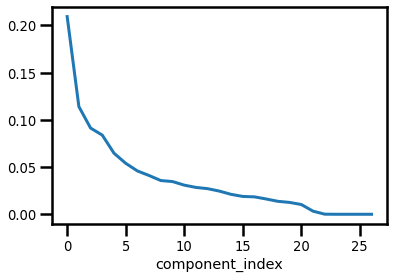

In [48]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("component_index");

We decided to choose a minimum number of principal components so that 95% of the variance is retained.

In [49]:
pca95 = PCA(.95)

In [50]:
pipe95 = Pipeline(steps=[
             ("scaler", StandardScaler()),
             ("imputer", SimpleImputer()),
             ("pca", pca95)])

In [51]:
X_train= pipe95.fit_transform(X_train)
X_test= pipe95.transform(X_test)

In [52]:
pca95.n_components_ 

18

In this case, 95% of the variance amounts to 18 principal components.

## 4. Modelling

In [53]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Models

In [54]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [55]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [56]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.039s
	Prediction time: 0.001s
	Explained variance: 0.713757208442229
	Mean absolute error: 11517.85228910908
	R2 score: 0.7137408954237887

Lasso()
	Training time: 0.025s
	Prediction time: 0.001s
	Explained variance: 0.7137600158377355
	Mean absolute error: 11517.568743886763
	R2 score: 0.713743704228001

Ridge()
	Training time: 0.013s
	Prediction time: 0.001s
	Explained variance: 0.7137572851522925
	Mean absolute error: 11517.834046220494
	R2 score: 0.7137409722086039

KNeighborsRegressor()
	Training time: 0.002s
	Prediction time: 27.408s
	Explained variance: 0.795002424063204
	Mean absolute error: 9639.948811881188
	R2 score: 0.7916647345762924

DecisionTreeRegressor()
	Training time: 2.169s
	Prediction time: 0.010s
	Explained variance: 0.5876132502448548
	Mean absolute error: 13198.487238723872
	R2 score: 0.5874356760507794

RandomForestRegressor()
	Training time: 128.925s
	Prediction time: 0.831s
	Explained variance: 0.8162545826550174
	Mean abs

The best R^2 estimate we got is from RandomForestRegressor. The estimation value is 0.8160.

### Cross Validation for Random Forest model

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
models[5]

RandomForestRegressor()

In [59]:
%%time
np.mean(cross_val_score(models[5], X_train, y_train, cv=10))

CPU times: total: 16min 55s
Wall time: 16min 59s


0.8137181744172428

### GridSearchCV for Random Forest model

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
%%time
RF_param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto','log2'],
    'max_depth' : [5,15]}
RF_GridCV = GridSearchCV(models[5], RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 300}
0.8128827415189882
CPU times: total: 4min 36s
Wall time: 44min 34s


In [64]:
results_RF= pd.DataFrame(RF_GridCV.cv_results_)
results_RF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,73.310092,11.078778,0.121925,0.006628,5,auto,100,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.713454,0.713495,0.707231,0.721936,0.720145,0.715252,0.005278,9
1,161.960253,12.586148,0.271609,0.041836,5,auto,200,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.714265,0.713955,0.707473,0.721672,0.720302,0.715533,0.005089,7
2,233.195635,20.055050,0.432333,0.050125,5,auto,300,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.713360,0.714414,0.707158,0.721578,0.719974,0.715297,0.005140,8
3,22.088408,2.219701,0.156348,0.050375,5,log2,100,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.644369,0.651652,0.630271,0.660623,0.652812,0.647946,0.010231,11
4,40.658116,1.368433,0.260517,0.046788,5,log2,200,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.639849,0.655112,0.643873,0.657866,0.646280,0.648596,0.006820,10
5,64.049632,5.203992,0.433251,0.063585,5,log2,300,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.642325,0.646425,0.639475,0.654285,0.642946,0.645091,0.005101,12
6,185.075156,4.340814,0.546362,0.095827,15,auto,100,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",0.812125,0.810924,0.807109,0.810319,0.817031,0.811502,0.003225,3
7,400.819897,13.377460,1.285154,0.199667,15,auto,200,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",0.811192,0.812689,0.809010,0.811705,0.817272,0.812374,0.002729,2
8,499.801821,55.697061,1.338897,0.142492,15,auto,300,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",0.812728,0.812884,0.809060,0.812482,0.817259,0.812883,0.002606,1
9,37.770614,1.668670,0.433730,0.076601,15,log2,100,"{'max_depth': 15, 'max_features': 'log2', 'n_e...",0.803205,0.804808,0.797603,0.810086,0.810759,0.805292,0.004829,6


In [65]:
RFmodelsample=RandomForestRegressor(n_estimators=500, max_depth=20)

In [66]:
RFmodelsample.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500)

In [67]:
print(RFmodelsample.score(X_train,y_train))
print(RFmodelsample.score(X_test,y_test))

0.9720345708025598
0.8183796242090459


### Polynomial Features

let's try to apply poly of degree 2:

In [68]:
from sklearn.preprocessing import PolynomialFeatures

pol= PolynomialFeatures(degree= 2) 

In [69]:
X_train= pol.fit_transform(X_train)
X_test= pol.transform(X_test)

In [70]:
%%time
for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 4.752s
	Prediction time: 0.020s
	Explained variance: 0.8061659099703166
	Mean absolute error: 9234.867381738173
	R2 score: 0.8061435459622663

Lasso()
	Training time: 2.804s
	Prediction time: 0.032s
	Explained variance: 0.8061731863485437
	Mean absolute error: 9233.856121344335
	R2 score: 0.8061511441728109

Ridge()
	Training time: 0.366s
	Prediction time: 0.007s
	Explained variance: 0.8061661635855406
	Mean absolute error: 9234.809222227635
	R2 score: 0.8061440662414023

KNeighborsRegressor()
	Training time: 0.049s
	Prediction time: 70.499s
	Explained variance: 0.7954543249353953
	Mean absolute error: 9661.911386138616
	R2 score: 0.7930215841494926

DecisionTreeRegressor()
	Training time: 22.298s
	Prediction time: 0.048s
	Explained variance: 0.58619400297606
	Mean absolute error: 13378.308855885589
	R2 score: 0.5858274924606379

RandomForestRegressor()
	Training time: 1261.293s
	Prediction time: 0.899s
	Explained variance: 0.8113903081644098
	Mean ab

Significant enhancement for linear, ridge, and lasso. R^2= 0.7137 ----> 0.8061
There are no good enhancements for other models and the times is too long

### Cross Validation for poly Ridge model

Let's validate our model(Ridge) by checking R^2 value for different training-testing data (k-fold)

It used Ridge which has the shortest time among others.

In [58]:
models[2]

Ridge()

In [71]:
%%time
np.mean(cross_val_score(models[2], X_train, y_train, cv=10))

CPU times: total: 6.5 s
Wall time: 6.05 s


0.8075847543213094

### GridSearchCV for poly Ridge model

In [72]:
%%time
RID_param_grid = { 
    'alpha': np.logspace(-3,3,13)}
RID_GridCV = GridSearchCV(models[2], RID_param_grid, cv=10, n_jobs= -1)
RID_GridCV.fit(X_train,y_train)  
print(RID_GridCV.best_params_)    
print(RID_GridCV.best_score_)

{'alpha': 316.22776601683796}
0.8075894149333653
CPU times: total: 2.3 s
Wall time: 46.4 s


In [73]:
results_RID= pd.DataFrame(RID_GridCV.cv_results_)
results_RID

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.060714,0.065947,0.011392,0.010784,0.001,{'alpha': 0.001},0.812211,0.804833,0.811449,0.808048,0.797999,0.803449,0.798804,0.816358,0.812243,0.810453,0.807585,0.005806,12
1,0.830479,0.080009,0.007396,0.005916,0.003162,{'alpha': 0.0031622776601683794},0.812211,0.804833,0.811449,0.808048,0.797999,0.803449,0.798804,0.816358,0.812243,0.810453,0.807585,0.005806,11
2,0.738059,0.030040,0.007396,0.003071,0.01,{'alpha': 0.01},0.812211,0.804833,0.811449,0.808048,0.797999,0.803449,0.798804,0.816358,0.812243,0.810453,0.807585,0.005806,10
3,0.737073,0.031360,0.006896,0.002164,0.031623,{'alpha': 0.03162277660168379},0.812211,0.804833,0.811449,0.808048,0.797999,0.803449,0.798804,0.816358,0.812243,0.810453,0.807585,0.005806,9
4,0.761089,0.043754,0.006896,0.002585,0.1,{'alpha': 0.1},0.812211,0.804833,0.811449,0.808048,0.798000,0.803449,0.798804,0.816358,0.812243,0.810453,0.807585,0.005806,8
5,0.718439,0.018290,0.010394,0.008097,0.316228,{'alpha': 0.31622776601683794},0.812211,0.804833,0.811449,0.808048,0.798000,0.803448,0.798804,0.816357,0.812243,0.810453,0.807585,0.005806,7
6,0.745465,0.023697,0.005896,0.001639,1.0,{'alpha': 1.0},0.812212,0.804833,0.811449,0.808048,0.798000,0.803448,0.798805,0.816357,0.812243,0.810453,0.807585,0.005806,6
7,0.715295,0.057962,0.006197,0.003058,3.162278,{'alpha': 3.1622776601683795},0.812212,0.804832,0.811448,0.808048,0.798000,0.803448,0.798806,0.816357,0.812244,0.810453,0.807585,0.005806,5
8,0.775625,0.064834,0.006297,0.002757,10.0,{'alpha': 10.0},0.812214,0.804830,0.811448,0.808047,0.798003,0.803446,0.798810,0.816356,0.812246,0.810454,0.807585,0.005805,4
9,0.789818,0.026457,0.006904,0.004224,31.622777,{'alpha': 31.622776601683793},0.812220,0.804823,0.811446,0.808044,0.798009,0.803441,0.798823,0.816353,0.812251,0.810454,0.807587,0.005803,3


## Conclusion

The best R^2 we get is 0.8160 which is very good estimation for Income. The model is Random Forest.

In [76]:
RF_predictions = models[5].predict(X_test)

RF_errors = abs(RF_predictions - y_test)
RF_mape = np.mean(100 * (RF_errors / y_test))
print('Mean Absolute Percentage Error:', RF_mape)

Mean Absolute Percentage Error: 15.864117197822267


A MAPE score of 15% indicates a "good" estimation.

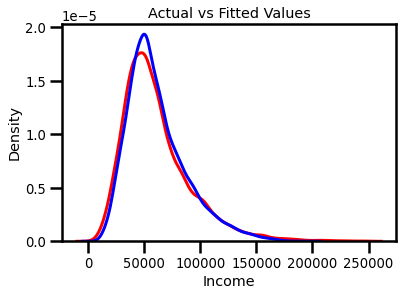

In [78]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(RF_predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Income')

plt.show()
plt.close()

Nearly the same distribution